# Homework 8: MapReduce, Hadoop and Spark

## 1 Warmup: counting words with mrjob
### 1.1

Look at the mr_word_count.py for the mrjob code for counting words.

### 1.2 
Code for running the code in Cavium cluster:

The 'simple_word_counts.txt' is copied into the local directory by 'scp'.

'simple.txt' and 'simple_word_counts.txt' are included in the folder

Contents of the files 'simple.txt' and 'simple_word_counts.txt' are given below:

In [28]:
fhand = open("simple.txt")
for line in fhand:
    print(line)
fhand.close()

Raining cats and dogs

Cats eat mice, mice eat cheese

Mice and cats and dogs have fleas



In [29]:
fhand = open("simple_word_counts.txt")
for line in fhand:
    print(line)
fhand.close()

"and"	3

"cats"	3

"cheese"	1

"dogs"	2

"eat"	2

"fleas"	1

"have"	1

"mice"	3

"raining"	1



### 1.3

Code for running the code 'mr_word_count.py' on the file 'darwin.txt' in Cavium cluster:

The file 'darwin_word_counts.txt' is included.

### 1.4

In [30]:
from matplotlib import pyplot as plt
import re
import numpy as np

fhand = open("darwin_word_counts.txt",'r+')

word = []
word_count = []
for line in fhand:
    d = re.split(r'\s',line)
    word.append(str(d[0]))
    word_count.append(int(d[1]))
word_count.sort(reverse=True)

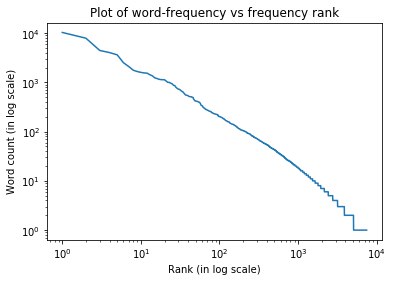

In [31]:
rank = np.array(range(len(word_count)))+1 ## Ranked according to ordinal ranking
fig = plt.figure()
ax = plt.gca()
ax.plot(np.array(rank),word_count,'-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Rank (in log scale)')
ax.set_ylabel('Word count (in log scale)')
ax.set_title('Plot of word-frequency vs frequency rank')
plt.savefig("zipf.pdf")
fhand.close()

### 1.5 
The resuling plot looks approximately like a line with negative slope in log-log scale


## 2. Computing Sample Statistics with mrjob

### 2.1

Look at the 'mr_summary_stats.py' file for the code. I have used $n$ in the denominator to calculate variance. Hence, the formula would be $$ \text{var}(x) = \frac1n\sum_{i=1}^n (x_i-\bar x)^2. $$

### 2.2

Code to run mrjob script for 'populations_small.txt' in cavium: 

Both 'populations_small.txt' and 'summary_small.txt' are included. Contents of these two files are shown below.

In [32]:
fhand = open("populations_small.txt")
for line in fhand:
    print(line)
fhand.close()

1 2.0

1 3.0

1 1.0

2 0.0

2 2.0

2 -2.0

3 10.0

3 10.0



In [33]:
fhand = open("summary_small.txt")
for line in fhand:
    print(line)
fhand.close()

1	[3, 2.0, 0.666666666666667]

2	[3, 0.0, 2.6666666666666665]

3	[2, 10.0, 0.0]



### 2.3

Code to run mrjob script for 'populations_large.txt' in cavium: 

### 2.4

To create the 95% confidence intervals, I assume that we have independent random samples from the 12 populations. Then the confidence intervals for each populations can be obtained as: $$ \bar X + z_{0.975}\frac{s}{\sqrt{n}}, $$ where $\bar X$ is the sample mean, $s$ is the standard deviation, and $z_{0.975}$ is the 0.975-th quantile for standard normal distribution. Though $n-1$ should be used to calculate $s^2$ as denominator, I'm OK with using $n$, since the sample sizes are very large.   

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
fhand = open("summary_large.txt")
import re
summary = []


for line in fhand:
    s = re.findall(r'\d+\.\d+|\d+',line)
    s = [float(i) for i in s]
    summary.append(s)
summary = pd.DataFrame(summary, columns = ['Population','Sample_size', 'Mean','Variance'])
summary['error'] = scipy.stats.norm.ppf(0.975)*np.sqrt(summary['Variance']/summary['Sample_size']) 
## Assuming the data are from normal distributions
summary.astype({'Population':'int32','Sample_size':'int64'})

,Population,Sample_size,Mean,Variance,error
0,0,83652,7.872799,523452.131628,4.902848
1,1,83161,3.157122,331623.946470,3.913913
2,10,83468,3.200230,440146.645072,4.500770
3,11,83047,8.976722,289433.906815,3.658987
4,2,83522,9.967419,716054.186068,5.738793
5,3,82993,0.285956,479637.579478,4.711769
6,4,83331,0.813253,476523.476441,4.686914
7,5,83271,3.597417,551408.217586,5.043567
8,6,83846,14.814938,404014.989810,4.302349
9,7,83282,1.616250,552487.339112,5.048167


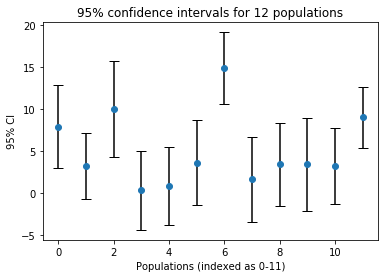

In [35]:
plt.errorbar(summary['Population'],summary['Mean'], yerr=summary['error'], marker='o', capsize=5, capthick=1, ecolor='black', ls = '')
plt.title('95% confidence intervals for 12 populations')
plt.xlabel('Populations (indexed as 0-11)')
plt.ylabel('95% CI')
plt.savefig('populations.pdf')
fhand.close()

## 3. Graph Processing: Counting Triangles with PySpark

### 3.1

The code for getting all the triangles in a graph is written in 'ps_fof.py'. The triangles are obtained by counting the number of occurances of an ordered two paths. If we form ordered two paths from the neighborhoods of a node, i.e, (1,[2,3,4]) > (1,2,3), (1,2,4), (1,3,4), then more than one occurance of these two paths will imply the presence of a triangle with these three nodes. The algorithm uses this fact. 

### 3.2

The script 'ps_fof.py' is tested on the HDFS directory 'hdfs:/var/stats507f19/fof/friends.simple'. The code is:

This saves the output in 'triangle_small' folder in HDFS. To save the output in local directory:

The 'small_triangle_list.txt' file in included in submission and the contents are shown below:

In [36]:
fhand = open("small_triangle_list.txt")
for line in fhand:
    print(line)
fhand.close()

200 300 400

100 300 400

100 200 300

100 200 400



There are 4 triangles in the small graph. 

### 3.3 

The script 'ps_fof.py' is tested on the HDFS directory 'hdfs:/var/stats507f19/fof/friends1000'. The code is:

This saves the output in 'triangle_small'folder in HDFS. To save the output in local directory:

The 'big_triangle_list.txt' file is included in submission.